In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.express as px
print("Setup Complete")

Setup Complete


In [16]:
url = 'https://raw.githubusercontent.com/JakubPyt/Demographic_Data_Analyzer/main/adult.data.csv'
df = pd.read_csv(url, sep=';')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


How many of people are represented in different relationship status? 

In [190]:
relationship_count = df['relationship'].value_counts()
relationship_count

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

Text(0, 0.5, 'Count')

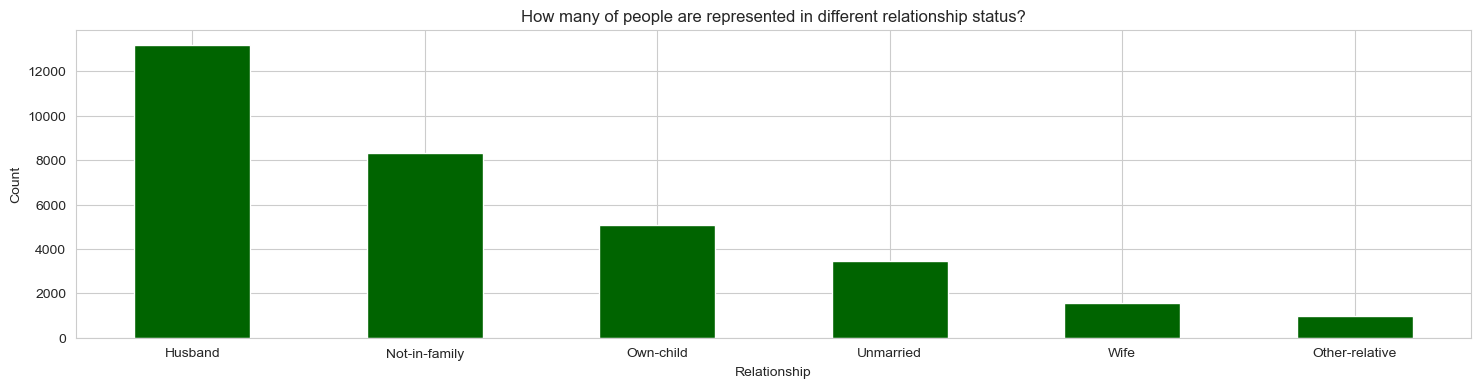

In [192]:
relationship_count.plot(kind='bar', 
                color = 'darkgreen', 
                figsize=(18,4))

plt.grid(True)
plt.title('How many of people are represented in different relationship status?', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.xlabel('Relationship', fontsize=10)
plt.ylabel('Count', fontsize=10)

What is the average age of men?

In [8]:
round(df.loc[df['sex']=='Male', 'age'].mean(), 0)

39.0

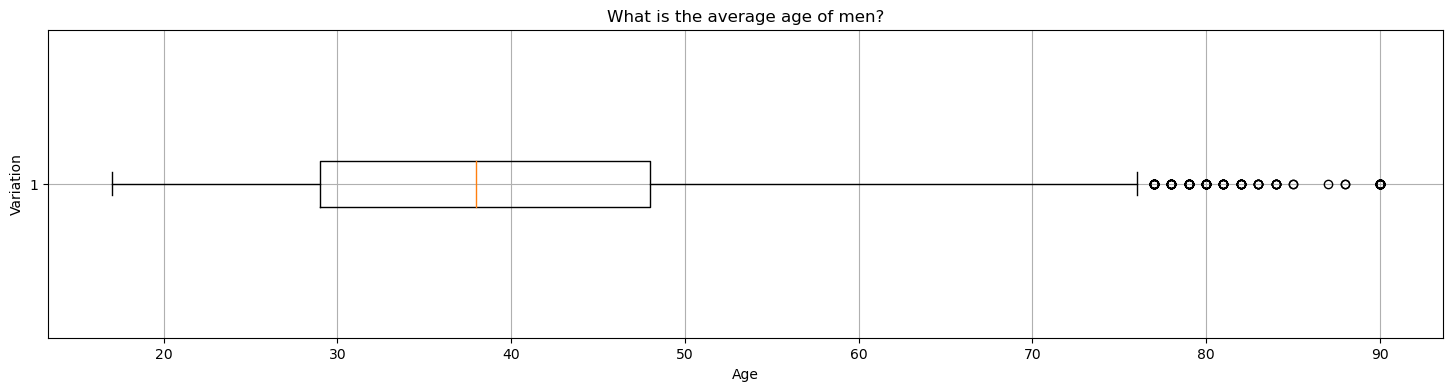

In [9]:
plt.figure(figsize = (18, 4)) 
plt.boxplot(df.loc[df['sex']=='Male', 'age'], vert=False) 

plt.grid(True)
plt.title('What is the average age of men?', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Variation')
  
plt.show() 

What is the percentage of people who have a Bachelor's degree?

In [10]:
perc_bach = round(df[df['education'] == 'Bachelors'].shape[0] / df.shape[0] * 100, 2)
print("Percentage of people with Bachelor's degree:", perc_bach, "%")

Percentage of people with Bachelor's degree: 16.45 %


In [11]:
px.pie(
    df,
    values=df[['education']].value_counts(),
    names=df['education'].value_counts().index,
    title="What is the percentage of people who have a Bachelor's degree?")

What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [12]:
higher_education = df[(df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')].shape[0]

higher_education_high_salary = df[((df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate'))
                    & (df['salary'] == '>50K')].shape[0]

phs_he = round (higher_education_high_salary / higher_education * 100, 2)
print("Percentage of people with higher education that earn >50K:", phs_he ,"%")

Percentage of people with higher education that earn >50K: 46.54 %


What percentage of people without advanced education make more than 50K?

In [13]:
higher_education = df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
high_salary = df['salary'] == '>50K'

phs_le = round((~higher_education & high_salary).sum() / (~higher_education).sum() * 100 ,2)
print("Percentage of people without advanced education that earn >50K:", phs_le ,"%")

Percentage of people without advanced education that earn >50K: 17.37 %


In [ ]:
df['type-education'] = np.where(
    ((df['education'] == "Doctorate") 
    | (df['education'] == "Bachelors") 
    | (df['education'] == "Masters")),
    "Higher education",
    "Lower education")
df

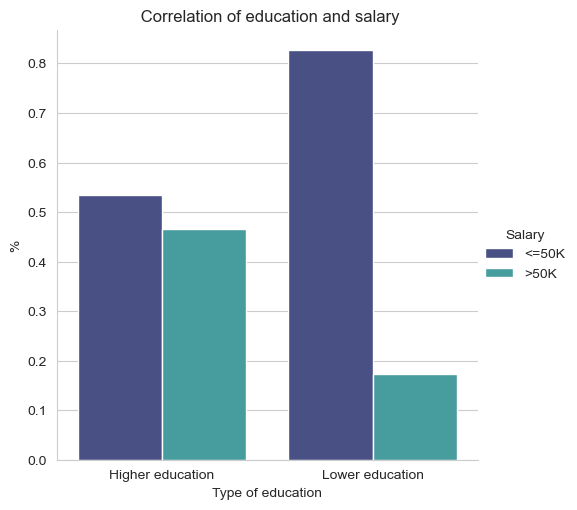

In [139]:
data = df.groupby('type-education')['salary'].value_counts(normalize=True).unstack().melt(ignore_index=False).reset_index()
data

sns.set_style("whitegrid")
dv = sns.catplot(data=data, 
                 kind = 'bar', 
                 x = 'type-education', 
                 y='value', 
                 hue='salary', palette="mako"
    )

dv.set(title=' Correlation of education and salary')
dv.set_axis_labels("Type of education", "%")
dv.legend.set_title("Salary")

plt.show() 

What is the minimum number of hours a person works per week?

In [33]:
min_work_time = df['hours-per-week'].min()
print("Min work time:", min_work_time, "hours per week")

Min work time: 1 hours per week


What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [39]:
min_work_time_high_salary = df[(df['hours-per-week'] == 1) & (df['salary'] == '>50K')].shape[0]
one_work_time = df[(df['hours-per-week'] == 1)].shape[0]

mwt_hs = round(min_work_time_high_salary / one_work_time * 100, 2)
print("Percentage of people who work the minimum number of hours per week that earn >50K:", mwt_hs ,"%")

Percentage of people who work the minimum number of hours per week that earn >50K: 10.0 %


<Axes: xlabel='hours-per-week', ylabel='value'>

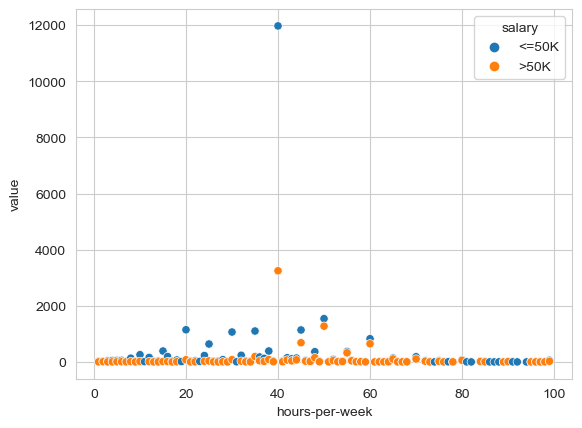

In [132]:
data1 = df.groupby('salary')['hours-per-week'].value_counts().unstack().melt(ignore_index=False).reset_index()
sns.scatterplot(x="hours-per-week", y="value", hue="salary", data=data1)

<Axes: xlabel='hours-per-week', ylabel='value'>

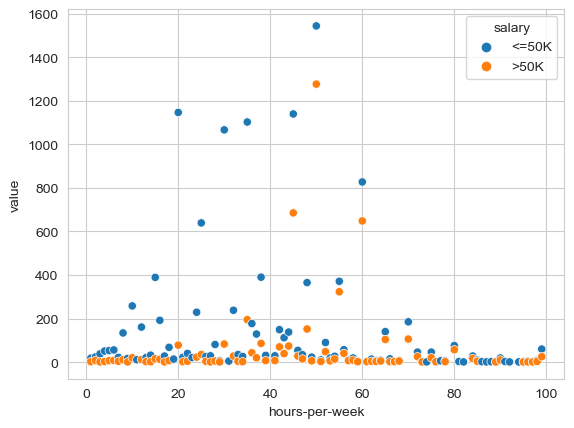

In [143]:
# Treatment of outliers in hours-per-week
data2 = data1[data1['hours-per-week']!= 40]

sns.scatterplot(x="hours-per-week", y="value", hue="salary", data=data2)

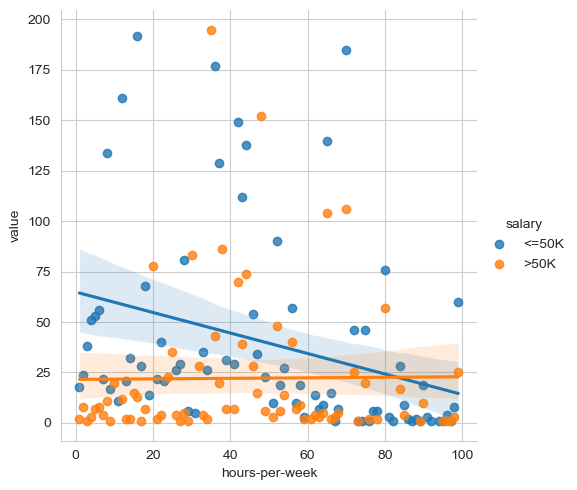

In [144]:
# Treatment of outliers in value
data3 = data1[data1['value']<200]

sns.lmplot(x="hours-per-week", y="value", hue="salary", data=data3)

What country has the highest percentage of people that earn >50K and what is that percentage?

In [207]:
percentage = (df[df['salary'] == '>50K']['native-country'].value_counts() / df['native-country'].value_counts() * 100).sort_values(ascending=False)

highest_earning_country = p.index[0]
highest_earning_country_percentage = round(p.iloc[0], 1)
print("Country with the highest percentage of people that earn >50K:", highest_earning_country)
print("Percentage:", highest_earning_country_percentage, "%")

Country with the highest percentage of people that earn >50K: Iran
Percentage: 41.9 %


Identify the most popular occupation for those who earn >50K in India.

In [213]:
ind_prof = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]['occupation'].value_counts()
ind_prof1 = ind_prof.index[0]
print("The most popular occupation for those who earn >50K in India:", ind_prof1)

The most popular occupation for those who earn >50K in India: Prof-specialty


Text(0, 0.5, 'Count')

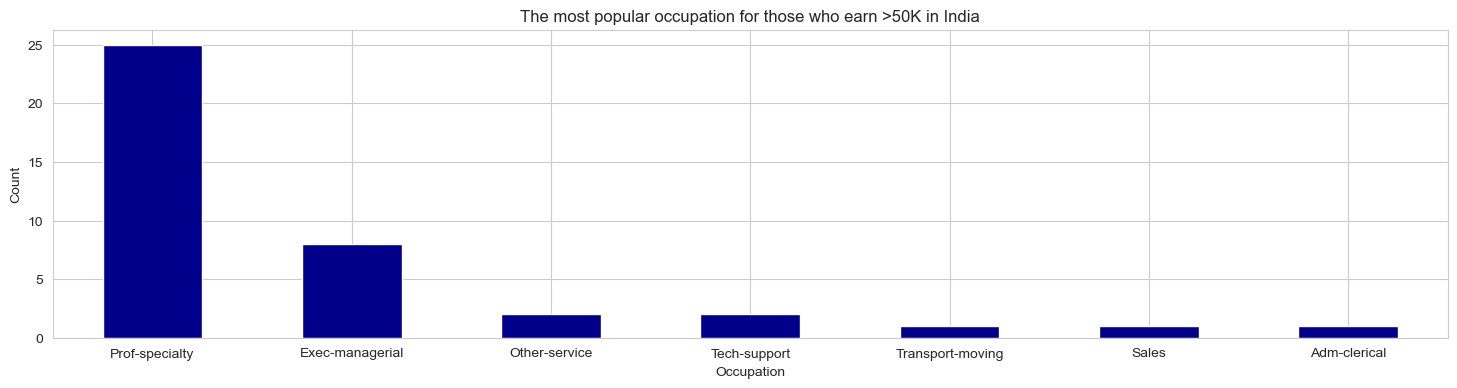

In [215]:
ind_prof.plot(kind='bar', 
                color = 'darkblue', 
                figsize=(18,4))

plt.grid(True)
plt.title('The most popular occupation for those who earn >50K in India', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.xlabel('Occupation', fontsize=10)
plt.ylabel('Count', fontsize=10)